In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Phillies players

phillies_data = master_data.loc[master_data["Franchise"] == "Phillies"]

#Only showing players that signed with the Phillies

signed_phillies_data = phillies_data.loc[phillies_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_phillies_data.groupby("Year")

#Unsigned Phillies draft picks

unsigned_phillies_data = phillies_data.loc[phillies_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

round(draft_class_year["Total_WAR"].sum().sort_values(ascending = False),1)

Year
1971    44.0
2000    43.1
1993    35.0
1998    33.2
1996    30.9
1972    29.8
2001    29.1
2002    28.8
2003    28.3
1974    25.0
1978    24.1
2014    23.5
1973    22.7
1997    21.4
1999    20.8
1969    17.2
2008    15.7
2007    14.2
1968    13.8
1990    13.0
1977    12.7
1984    12.6
1965    12.1
1979    12.0
1975    10.6
1985     9.4
2011     9.4
1991     9.3
1976     8.5
1988     8.3
1982     6.1
1981     6.0
1989     5.8
1995     5.5
1983     4.0
2015     2.6
1986     2.6
2010     2.4
2013     1.7
1966     1.5
1992     1.1
2017     0.9
2006     0.9
2004     0.8
1980     0.7
2016     0.2
2009     0.0
2018     0.0
1967     0.0
2019     0.0
2005    -0.1
1994    -0.6
2012    -1.0
1970    -3.0
1987    -5.4
Name: Total_WAR, dtype: float64

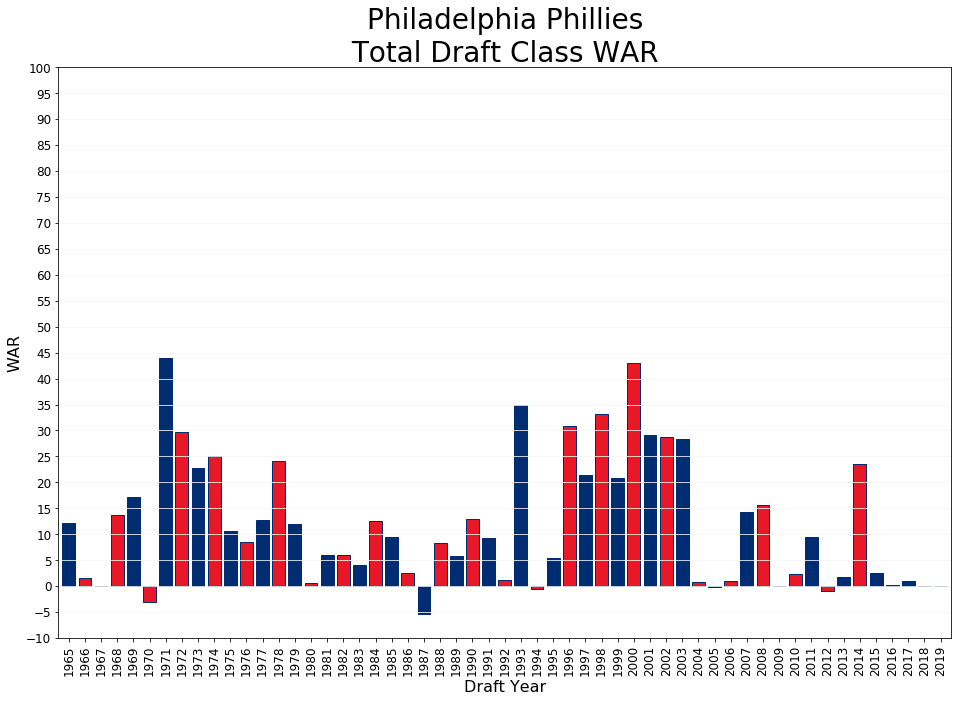

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#002D72", "#E81828"], width = .8, fontsize = 12, edgecolor = "#002D72", figsize = (16, 10.5))
plt.title("Philadelphia Phillies\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Phillies WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_phillies_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
5540,1971,2,30,Phillies,Phillies,Y,Mike Schmidt,1972.0,schmimi01,1011586.0,42.5,0.0,42.5,SS,4Yr,Ohio University,Athens,OH,More than 25 WAR
38311,2000,1,15,Phillies,Phillies,Y,Chase Utley,2003.0,utleych01,1679.0,40.1,0.0,40.1,2B,4Yr,University of California Los Angeles,Los Angeles,CA,More than 25 WAR
26987,1993,2,46,Phillies,Phillies,Y,Scott Rolen,1996.0,rolensc01,970.0,32.6,0.0,32.6,3B,HS,Jasper HS,Jasper,IN,More than 25 WAR
41250,2002,1,17,Phillies,Phillies,Y,Cole Hamels,2006.0,hamelco01,4972.0,0.7,28.2,28.9,LHP,HS,Rancho Bernardo HS,San Diego,CA,More than 25 WAR
11215,1978,20,511,Phillies,Phillies,Y,Ryne Sandberg,1981.0,sandbry01,1011411.0,23.7,0.0,23.7,INF,HS,North Central HS,Spokane,WA,20-25 WAR
39888,2001,5,140,Phillies,Phillies,Y,Ryan Howard,2004.0,howarry01,2154.0,19.7,0.0,19.7,1B,4Yr,Missouri State University,Springfield,MO,15-20 WAR
42830,2003,4,115,Phillies,Phillies,Y,Michael Bourn,2006.0,bournmi01,6387.0,19.1,0.0,19.1,OF,4Yr,University of Houston,Houston,TX,15-20 WAR
32078,1996,2,46,Phillies,Phillies,Y,Jimmy Rollins,2000.0,rolliji01,971.0,18.9,0.0,18.9,SS,HS,Encinal HS,Alameda,CA,15-20 WAR
33824,1997,2,54,Phillies,Phillies,Y,Randy Wolf,1999.0,wolfra02,976.0,1.9,15.9,17.8,LHP,4Yr,Pepperdine University,Malibu,CA,15-20 WAR
58690,2014,1,7,Phillies,Phillies,Y,Aaron Nola,2015.0,nolaaa01,16149.0,-0.7,17.2,16.5,RHP,4Yr,Louisiana State University,Baton Rouge,LA,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_phillies_data.loc[((signed_phillies_data["WAR Group"] == "Less than 5 WAR") |
(signed_phillies_data["WAR Group"] == "No Major League Experience")) & 
(signed_phillies_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
832,1966,1,9,Phillies,Phillies,Y,Michael Biko,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,W.W. Samuel HS,Dallas,TX,No Major League Experience
1668,1967,1,14,Phillies,Phillies,Y,Phil Meyer,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Pius X HS,Downey,CA,No Major League Experience
4588,1970,1,5,Phillies,Phillies,Y,Mike Martin,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Olympia HS,Columbia,SC,No Major League Experience
5516,1971,1,6,Phillies,Phillies,Y,Roy Thomas,1977.0,thomaro02,1012993.0,-0.1,2.1,2.0,RHP,HS,Lompoc HS,Lompoc,CA,Less than 5 WAR
8548,1975,1,12,Phillies,Phillies,Y,Sammye Welborn,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Wichita Falls HS,Wichita Falls,TX,No Major League Experience
9232,1976,1,17,Phillies,Phillies,Y,Jeff Kraus,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Colerain HS,Cincinnati,OH,No Major League Experience
9950,1977,1,22,Phillies,Phillies,Y,Scott Munninghoff,1980.0,munnisc01,1009324.0,0.1,0.0,0.1,RHP,HS,Purcell Marian HS,Cincinnati,OH,Less than 5 WAR
10726,1978,1,23,Phillies,Phillies,Y,Rip Rollins,NaN,NaN,NaN,NaN,NaN,NaN,1B,HS,Allegheny HS,Sparta,NC,No Major League Experience
12365,1980,1,13,Phillies,Phillies,Y,Henry Powell,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Pine Forest HS,Pensacola,FL,No Major League Experience
13204,1981,1,20,Phillies,Phillies,Y,Johnny Abrego,1985.0,abregjo01,1000027.0,-0.1,0.1,0.0,RHP,HS,Mission HS,San Jose,CA,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_phillies_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
17818,1986,18,452,Phillies,Phillies,N,Chuck Knoblauch,1991.0,knoblch01,609.0,33.6,0.0,33.6,SS,HS,Bellaire HS,Bellaire,TX,More than 25 WAR
33772,1997,1,2,Phillies,Phillies,N,J.D. Drew,1998.0,drewj.01,1152.0,26.1,0.0,26.1,OF,4Yr,Florida State University,Tallahassee,FL,More than 25 WAR
24403,1991,18,473,Phillies,Phillies,N,Bobby Higginson,1995.0,higgibo02,469.0,16.7,0.0,16.7,OF,4Yr,Temple University,Philadelphia,PA,15-20 WAR
48281,2006,36,1087,Phillies,Phillies,N,Kyle Gibson,2013.0,gibsoky01,10123.0,0.2,13.0,13.2,RHP,HS,Greenfield Central HS,Greenfield,IN,10-15 WAR
13697,1981,20,513,Phillies,Phillies,N,Vince Coleman,1985.0,colemvi01,1002433.0,12.7,0.0,12.7,OF,4Yr,Florida Agricultural and Mechanical University,Tallahassee,FL,10-15 WAR
22978,1990,20,535,Phillies,Phillies,N,Marvin Benard,1995.0,benarma01,1382.0,8.1,0.0,8.1,OF,JC,Los Angeles Harbor College,Wilmington,CA,5-10 WAR
14802,1982,31,766,Phillies,Phillies,N,Bruce Ruffin,1986.0,ruffibr01,1011294.0,-1.1,9.0,7.9,LHP,HS,Hanks HS,El Paso,TX,5-10 WAR
36978,1999,5,156,Phillies,Phillies,N,Joe Saunders,2005.0,saundjo01,4366.0,0.0,7.0,7.0,LHP,HS,West Springfield HS,Springfield,VA,5-10 WAR
25834,1992,11,305,Phillies,Phillies,N,Casey Blake,1999.0,blakeca01,719.0,6.8,0.0,6.8,SS,HS,Indianola HS,Indianola,IA,5-10 WAR
55780,2011,35,1081,Phillies,Phillies,N,Kyle Freeland,2017.0,freelky01,16256.0,-0.3,6.3,6.0,LHP,HS,Thomas Jefferson HS,Denver,CO,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_phillies_data.loc[signed_phillies_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
11215,1978,20,511,Phillies,Phillies,Y,Ryne Sandberg,1981.0,sandbry01,1011411.0,23.7,0.0,23.7,INF,HS,North Central HS,Spokane,WA,20-25 WAR
12143,1979,26,661,Phillies,Phillies,Y,Kelly Downs,1986.0,downske01,1003453.0,-0.4,10.0,9.6,RHP,HS,Viewmont HS,Bountiful,UT,5-10 WAR
10439,1977,20,511,Phillies,Phillies,Y,Greg Walker,1982.0,walkegr01,1013520.0,8.4,0.0,8.4,C,HS,Coffee HS,Douglas,GA,5-10 WAR
13489,1981,12,305,Phillies,Phillies,Y,Charles Hudson,1983.0,hudsoch02,1006134.0,-1.1,7.3,6.2,RHP,4Yr,Prairie View A&M University,Prairie View,TX,5-10 WAR
35991,1998,21,614,Phillies,Phillies,Y,Nick Punto,2001.0,puntoni01,1429.0,5.4,0.0,5.4,SS,HS,Saddleback HS,Santa Ana,CA,5-10 WAR
49619,2007,30,923,Phillies,Phillies,Y,Jake Diekman,2012.0,diekmja01,5003.0,0.0,4.1,4.1,LHP,JC,Cloud County Community College,Concordia,KS,Less than 5 WAR
16030,1984,13,335,Phillies,Phillies,Y,Todd Frohwirth,1987.0,frohwto01,1004374.0,-0.1,4.1,4.0,RHP,4Yr,Northwest Missouri State University,Maryville,MO,Less than 5 WAR
43310,2003,20,595,Phillies,Phillies,Y,Brad Ziegler,2008.0,zieglbr01,7293.0,0.0,3.9,3.9,RHP,4Yr,Missouri State University,Springfield,MO,Less than 5 WAR
16331,1984,25,636,Phillies,Phillies,Y,Bob Scanlan,1991.0,scanlbo01,1011489.0,-0.2,3.5,3.3,RHP,HS,Harvard HS,Beverly Hills,CA,Less than 5 WAR
22817,1990,14,374,Phillies,Phillies,Y,Mike Williams,1992.0,willimi03,1014.0,0.0,2.9,2.9,RHP,4Yr,Virginia Polytechnic Institute and State Unive...,Blacksburg,VA,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(phillies_data["Year"], phillies_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,51.6,48.4,0.0
1966,32.0,64.0,4.0
1967,12.5,79.2,8.3
1968,20.7,79.3,0.0
1969,58.1,38.7,3.2
1970,42.9,50.0,7.1
1971,23.7,60.5,15.8
1972,28.0,60.0,12.0
1973,31.8,63.6,4.5


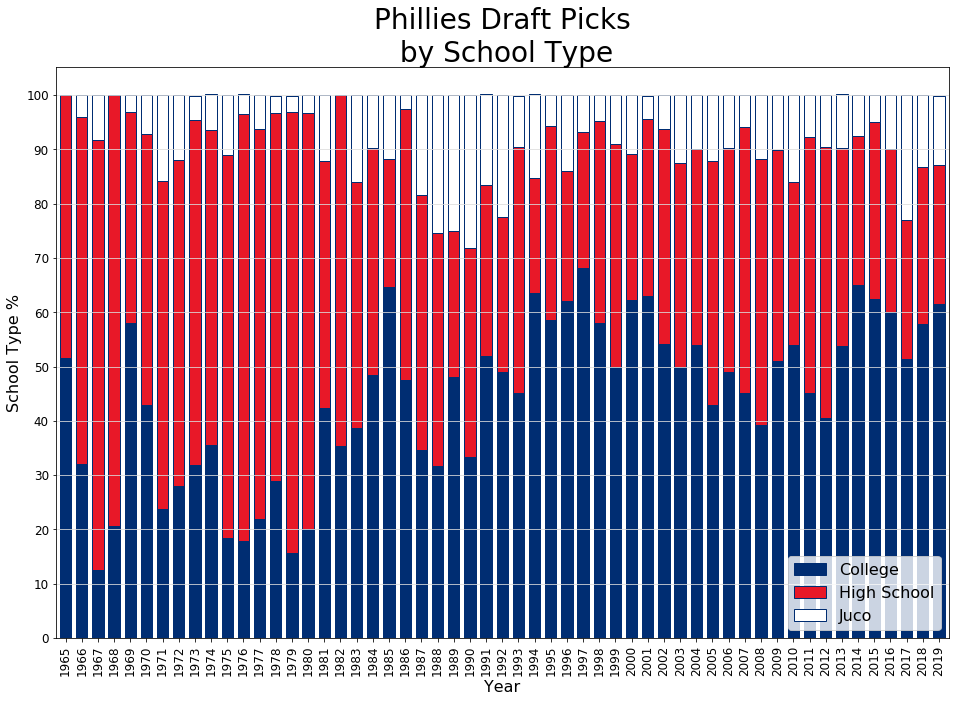

In [12]:
#Bar chart of table above

colors = ["#002D72", "#E81828", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#002D72", stacked = True, figsize = (16, 10.5))
plt.title("Phillies Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Phillies Draft Picks by School Type.png")
plt.show()